In [1]:
import sys
sys.path.insert(0, "..")

import tensorflow as tf
import tensorflow_datasets as tfds
import torch
from matplotlib.pyplot import imshow
import rich
from rich.progress import track

In [2]:
from src.datamodules.div2k import Div2kDatamodule

d = Div2kDatamodule(
    batch_size=2,
    patch_size=256,
    subset='bicubic_x8',
    data_dir='../data',
)
d.setup_data()

2022-04-21 02:59:53.330098: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
tr = d.train_dataloader()

In [10]:
b = next(iter(tr))

In [11]:
b['hr']['image'].shape

(2, 3, 256, 256)

In [12]:
b['hr']['image'][1].min(), b['hr']['image'][1].max()

(-1.938411, 1.9256662)

In [13]:
b['lr']['image'][1].min(), b['lr']['image'][1].max()

(-1.987897, 1.793546)

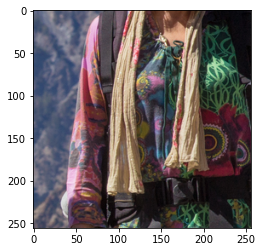

In [14]:
idx = 1

def denorm(img):
    img = img - img.min()
    scale = 1 / (img.max() - img.min())
    img = scale * img
    return img

imshow(denorm(b['hr']['image'][idx]).transpose([1,2,0]))

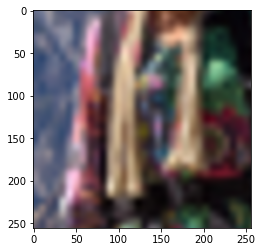

In [15]:
imshow(denorm(b['lr']['image'][idx]).transpose([1,2,0]))